
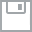
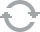
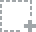
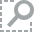
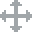
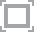
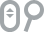
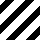
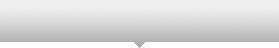
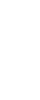
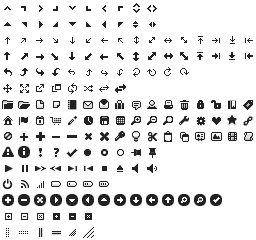
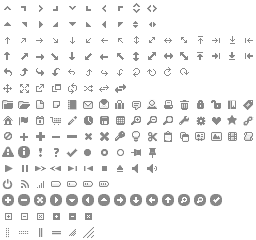
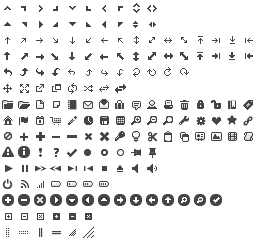
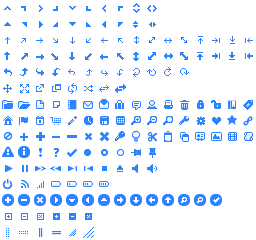
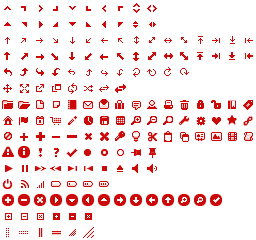
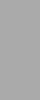
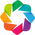
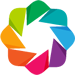

In [155]:
#import needed libraries 
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans, MeanShift,estimate_bandwidth
import seaborn as sns
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from bokeh.plotting import figure,show,output_notebook
output_notebook()


%matplotlib inline

In [66]:
#import dataset
df = pd.read_csv('./custdata.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 30.9 KB


### Normalize Columns that can be normalized

In [68]:
#normalize Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen columns

cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
df_norm = df

df_norm.iloc[:,[2,3,4,5,6,7]] = normalize(df_norm.iloc[:,[2,3,4,5,6,7]])

### Fit kmeans with 3 central clusters to start off

In [114]:
km = KMeans(9)
km.fit(df_norm)

centers = km.cluster_centers_
centers


array([[ 2.        ,  3.        ,  0.19189479,  0.47407445,  0.73767516,
         0.05977826,  0.33048666,  0.07550252],
       [ 1.        ,  1.        ,  0.86782386,  0.1629904 ,  0.19596869,
         0.23987359,  0.05533515,  0.06933144],
       [ 1.        ,  3.        ,  0.89396897,  0.15461513,  0.18143824,
         0.23450545,  0.03434212,  0.0682281 ],
       [ 2.        ,  1.        ,  0.22808804,  0.41875169,  0.71796692,
         0.13516825,  0.31643191,  0.08496839],
       [ 2.        ,  3.        ,  0.75277363,  0.32798524,  0.45471475,
         0.08348266,  0.17295798,  0.08346425],
       [ 1.        ,  3.        ,  0.35899063,  0.48562143,  0.56473242,
         0.22504632,  0.13214519,  0.16458801],
       [ 1.        ,  2.        ,  0.69964796,  0.17898399,  0.35696235,
         0.30964514,  0.03983506,  0.08756302],
       [ 1.        ,  1.        ,  0.25782528,  0.59585328,  0.58944138,
         0.17534144,  0.1829035 ,  0.09718146],
       [ 2.        ,  2.        

In [115]:
labels = km.labels_
silhouette_score(df_norm,labels,metric='euclidean')

0.49188384446296401

### Silhouette score as a measure of number of clusters

In [112]:
#your code here:
scores = []
for k in range(2,16):
    km = KMeans(k)
    km.fit(df_norm)
    labels = km.labels_
    score = silhouette_score(df_norm,labels,metric='euclidean')
    scores.append(score)

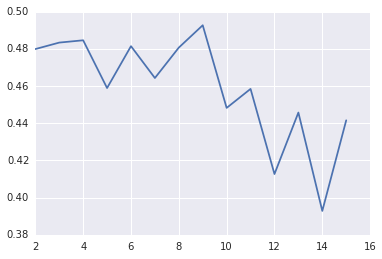

In [116]:
plt.plot(range(2,16),scores) #without reducing dimensions / features kmeans the ideal value for k would be 9.

/Users/raymondma/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


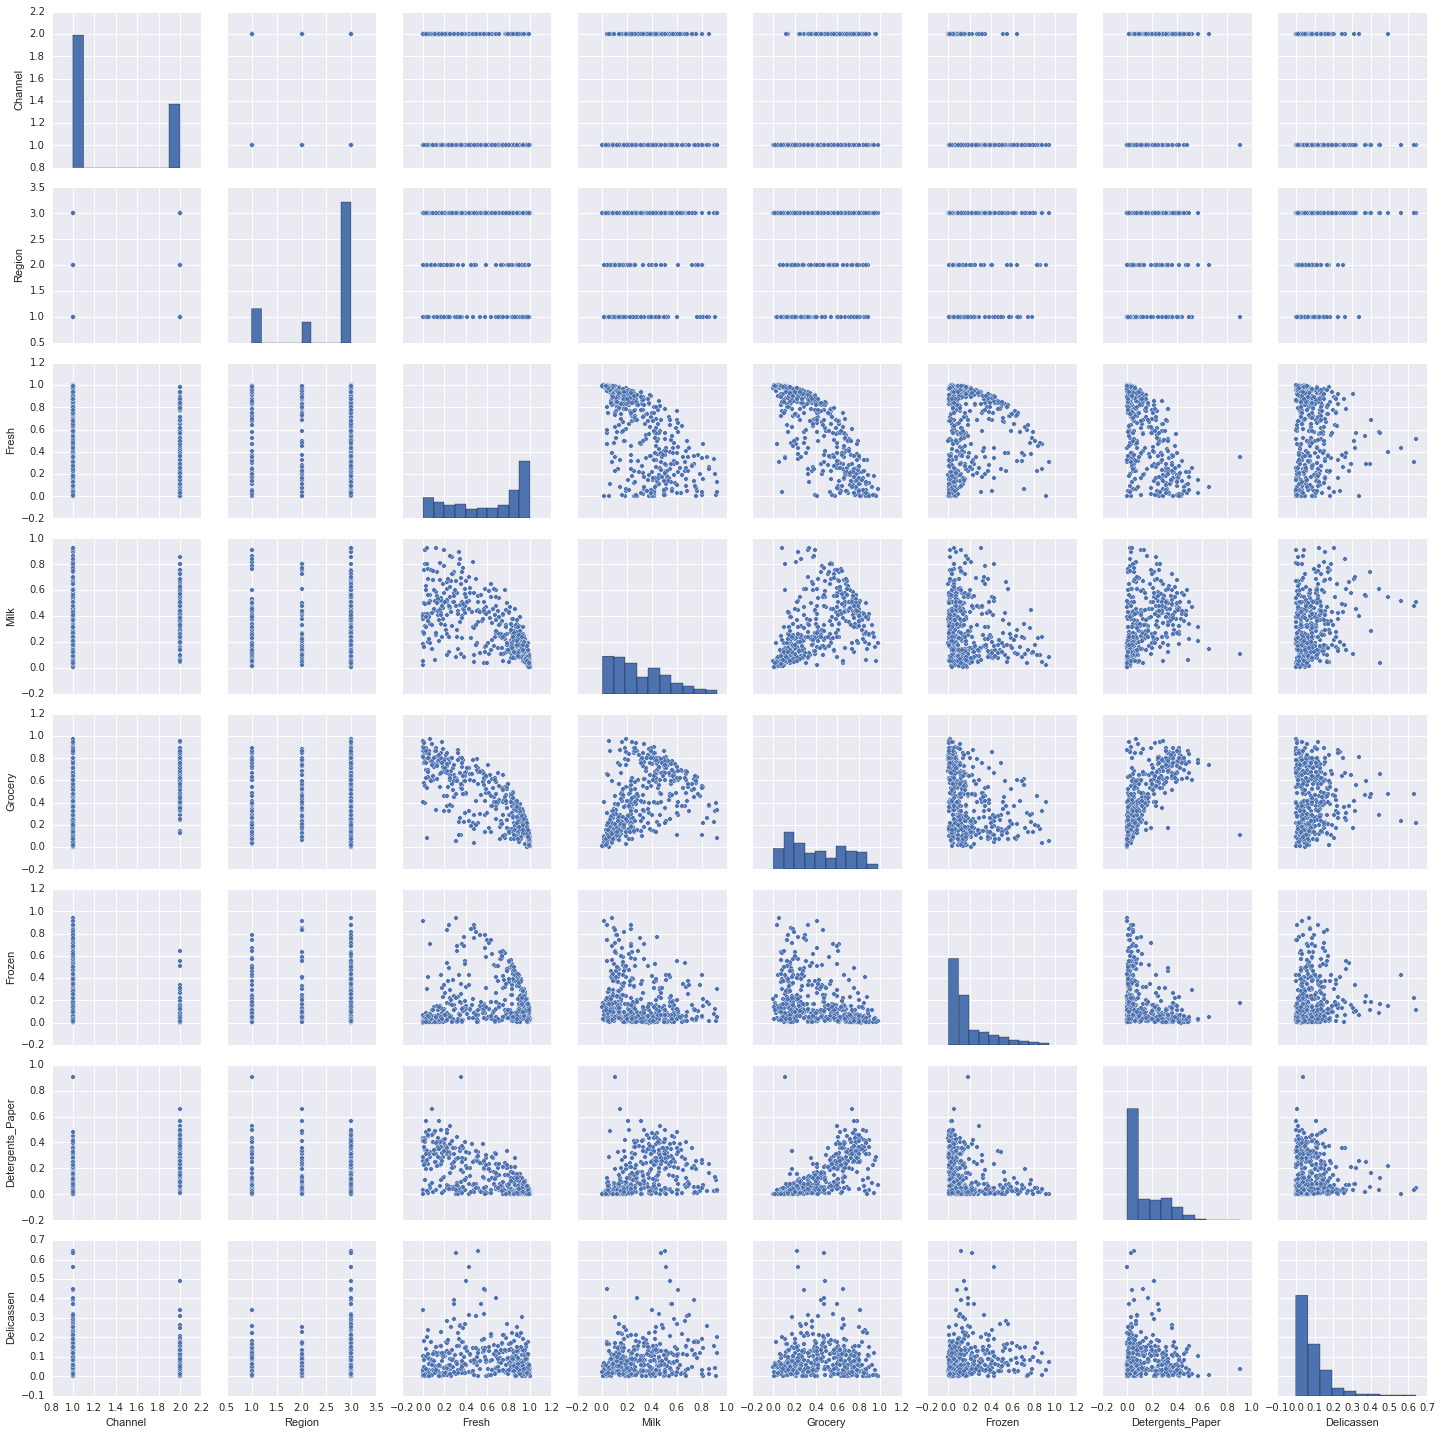

In [73]:
sns.pairplot(df)

In [89]:
pca = PCA(n_components=2)
X_df = pca.fit(df_norm).transform(df_norm)

In [90]:
# Percentage of variance explained (first two components):
print "First component: " + str(pca.explained_variance_ratio_[0])
print "Second component: " + str(pca.explained_variance_ratio_[1])

First component: 0.535366242642
Second component: 0.300396384853


In [126]:
km = KMeans(8)
km.fit(X_df)

centers = km.cluster_centers_
centers

array([[-0.5047488 ,  0.82015891],
       [ 1.54997888,  0.17736286],
       [-0.43126916, -0.50645634],
       [ 0.56469953, -0.31489047],
       [-0.45959028,  0.12763616],
       [ 0.49365886,  0.83105563],
       [ 1.56419083, -0.42050864],
       [ 1.49168079,  0.99584006]])

In [127]:
labels = km.labels_
silhouette_score(X_df,labels,metric='euclidean')

0.70752821243234532

In [105]:
scores = []
for k in range(2,16):
    km = KMeans(k)
    km.fit(X_df)
    labels = km.labels_
    score = silhouette_score(X_df,labels,metric='euclidean')
    scores.append(score)

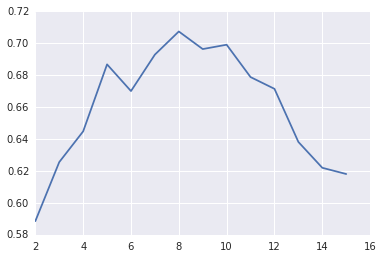

In [109]:
plt.plot(range(2,16),scores) #8 is optimal value for clusters

In [131]:
p = figure(title="Clusters in dataset",tools='')

p.circle(x = X_df[:,0],y= X_df[:,1],size = 5)


p.circle(x= centers[:,0],y=centers[:,1],
        alpha=0.4,
        color='green',
        size=100)

show(p)

In [165]:
bandwidth = estimate_bandwidth(X_df, quantile=0.3)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_df)

MeanShift(bandwidth=0.77609128102234592, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=1, seeds=None)

In [166]:
labels = ms.labels_
silhouette_score(X_df,labels,metric='euclidean')

0.51257030346937282

In [167]:
centers = ms.cluster_centers_

p = figure(title="Clusters in dataset",tools='')

p.circle(x = X_df[:,0],y= X_df[:,1],size = 5)


p.circle(x= centers[:,0],y=centers[:,1],
        alpha=0.4,
        color='green',
        size=100)

show(p)